# Sentiment Analysis
Leah Hogenmiller (lmh2ur)

## Set Up

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import plotly_express as px
from IPython.display import display, HTML

In [41]:
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

## Importing Tables

In [42]:
CORPUS = pd.read_csv('CORPUS.csv').set_index(OHCO).sort_index()
VOCAB = pd.read_csv('VOCAB.csv').set_index('term_str').sort_index()
LIB = pd.read_csv('LIB.csv').set_index('book_id')[['author','title']].sort_index()
BOW = pd.read_csv('BOW.csv').set_index(['book_id','chap_id','term_str']).sort_index()

In [43]:
SALEX = pd.read_csv('salex_nrc.csv').set_index('term_str')
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [44]:
SALEX

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,nrc_sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [45]:
LIB['title_short'] = LIB.author + ' ' + LIB.index.astype('str') + ': ' + LIB.title.str[:25] 

## Get SA Lexicon

In [46]:
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [47]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [48]:
SALEX.to_csv('SALEX.csv')

## Combine with VOCAB

In [49]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [50]:
V

,n,n_chars,p,i,max_pos,df,idf,dfidf,tfidf_mean,tfidf_sum,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
abandon,12,7,0.000014,16.159438,VB,10,4.705978,47.059779,0.000065,0.016867,...,0,0,1,0,1,0,1,0,0,-1
abandoned,23,9,0.000026,15.220838,VB,22,3.568474,78.506436,0.000095,0.024756,...,0,0,1,0,1,0,1,0,0,-1
abandonment,1,11,0.000001,19.744400,NN,1,8.027906,8.027906,0.000014,0.003664,...,0,0,1,0,1,0,1,1,0,-1
abduction,1,9,0.000001,19.744400,NN,1,8.027906,8.027906,0.000007,0.001931,...,0,0,1,0,1,0,1,1,0,-1
abhor,2,5,0.000002,18.744400,VB,2,7.027906,14.055812,0.000015,0.003902,...,0,1,1,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
young,711,5,0.000809,10.270695,JJ,201,0.376854,75.747715,0.000337,0.088061,...,1,0,0,1,0,1,0,1,0,1
youth,40,5,0.000046,14.422472,NN,38,2.779978,105.639182,0.000133,0.034653,...,1,0,1,1,0,1,0,1,0,1
zeal,9,4,0.000010,16.574475,NN,9,4.857981,43.721829,0.000057,0.014748,...,1,0,0,1,0,1,0,1,1,1


In [51]:
V.to_csv('V.csv')

## Merge VOCAB With BOW

In [52]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [53]:
B

n        tf     tfidf max_pos  anger  \
book_id chap_id term_str                                             
244     1       accurate      1  0.000359  0.001639      JJ    0.0   
                agreeable     1  0.000359  0.002047      JJ    0.0   
                alarming      1  0.000359  0.001952      VB    0.0   
                annoy         1  0.000359  0.001803      VB    1.0   
                astonishment  1  0.000359  0.000727      NN    0.0   
...                          ..       ...       ...     ...    ...   
70114   18      war           1  0.000329  0.000698      NN    0.0   
                weight        1  0.000329  0.001012      NN    0.0   
                wonderful     2  0.000659  0.001497      JJ    0.0   
                words         2  0.000659  0.000391      NN    1.0   
                youth         1  0.000329  0.000915      NN    1.0   

                              anticipation  disgust  fear  joy  sadness  \
book_id chap_id term_str                                                  
244     1       accurate               0.0      0.0   0.0  0.0      0.0   
                agreeable              0.0      0.0   0.0  0.0      0.0   
                alarming               0.0      0.0   1.0  0.0      0.0   
                annoy                  0.0      1.0   0.0  0.0      0.0   
                astonishment           0.0      0.0   0.0  1.0      0.0   
...                                    ...      ...   ...  ...      ...   
70114   18      war                    0.0      0.0   1.0  0.0      0.0   
                weight                 1.0      1.0   1.0  1.0      1.0   
                wonderful              0.0      0.0   0.0  1.0      0.0   
                words                  0.0      0.0   0.0  0.0      0.0   
                youth                  1.0      0.0   1.0  1.0      0.0   

                              surprise  trust  sentiment  
book_id chap_id term_str                                  
244     1       accurate           0.0    1.0        1.0  
                agreeable          0.0    1.0        1.0  
                alarming           1.0    0.0       -1.0  
                annoy              0.0    0.0       -1.0  
                astonishment       1.0    0.0        1.0  
...                                ...    ...        ...  
70114   18      war                0.0    0.0       -1.0  
                weight             1.0    1.0        0.0  
                wonderful          1.0    1.0        1.0  
                words              0.0    0.0       -1.0  
                youth              1.0    0.0        1.0  

[31187 rows x 13 columns]

## Weight Emotions by TFIDF

In [54]:
for col in emo_cols:
    B[col] = B[col] * B.tfidf

In [55]:
B

n        tf     tfidf max_pos     anger  \
book_id chap_id term_str                                                
244     1       accurate      1  0.000359  0.001639      JJ  0.000000   
                agreeable     1  0.000359  0.002047      JJ  0.000000   
                alarming      1  0.000359  0.001952      VB  0.000000   
                annoy         1  0.000359  0.001803      VB  0.001803   
                astonishment  1  0.000359  0.000727      NN  0.000000   
...                          ..       ...       ...     ...       ...   
70114   18      war           1  0.000329  0.000698      NN  0.000000   
                weight        1  0.000329  0.001012      NN  0.000000   
                wonderful     2  0.000659  0.001497      JJ  0.000000   
                words         2  0.000659  0.000391      NN  0.000391   
                youth         1  0.000329  0.000915      NN  0.000915   

                              anticipation   disgust      fear       joy  \
book_id chap_id term_str                                                   
244     1       accurate          0.000000  0.000000  0.000000  0.000000   
                agreeable         0.000000  0.000000  0.000000  0.000000   
                alarming          0.000000  0.000000  0.001952  0.000000   
                annoy             0.000000  0.001803  0.000000  0.000000   
                astonishment      0.000000  0.000000  0.000000  0.000727   
...                                    ...       ...       ...       ...   
70114   18      war               0.000000  0.000000  0.000698  0.000000   
                weight            0.001012  0.001012  0.001012  0.001012   
                wonderful         0.000000  0.000000  0.000000  0.001497   
                words             0.000000  0.000000  0.000000  0.000000   
                youth             0.000915  0.000000  0.000915  0.000915   

                               sadness  surprise     trust  sentiment  
book_id chap_id term_str                                               
244     1       accurate      0.000000  0.000000  0.001639   0.001639  
                agreeable     0.000000  0.000000  0.002047   0.002047  
                alarming      0.000000  0.001952  0.000000  -0.001952  
                annoy         0.000000  0.000000  0.000000  -0.001803  
                astonishment  0.000000  0.000727  0.000000   0.000727  
...                                ...       ...       ...        ...  
70114   18      war           0.000000  0.000000  0.000000  -0.000698  
                weight        0.001012  0.001012  0.001012   0.000000  
                wonderful     0.000000  0.001497  0.001497   0.001497  
                words         0.000000  0.000000  0.000000  -0.000391  
                youth         0.000000  0.000915  0.000000   0.000915  

[31187 rows x 13 columns]

In [56]:
B.to_csv('B.csv')

## Emotions by Book and Chapter

In [57]:
EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_CHAPS = B.groupby(['book_id','chap_id'])[emo_cols].mean()

In [58]:
EMO_BOOKS.index = LIB.title_short

In [59]:
EMO_BOOKS

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
title_short,,,,,,,,,
Arthur Conan Doyle 244: A Study in Scarlet,0.000394,0.000333,0.000289,0.000474,0.000315,0.000419,0.000216,0.000401,-0.000184
Arthur Conan Doyle 834: The Memoirs of Sherlock H,0.000161,0.000131,0.000116,0.000209,0.000125,0.000166,0.000085,0.000198,-0.000050
Agatha Christie 863: The Mysterious Affair at,0.000284,0.000193,0.000279,0.000344,0.000210,0.000301,0.000130,0.000276,-0.000228
Agatha Christie 1155: The Secret Adversary,0.000420,0.000350,0.000295,0.000513,0.000340,0.000403,0.000244,0.000502,-0.000137
Arthur Conan Doyle 1661: The Adventures of Sherloc,0.000147,0.000149,0.000113,0.000190,0.000147,0.000166,0.000086,0.000215,-0.000030
Arthur Conan Doyle 2097: The Sign of the Four,0.000289,0.000353,0.000229,0.000361,0.000314,0.000311,0.000163,0.000407,-0.000060
Arthur Conan Doyle 3070: The Hound of the Baskervi,0.000297,0.000227,0.000224,0.000388,0.000216,0.000365,0.000145,0.000343,-0.000150
Arthur Conan Doyle 3289: The Valley of Fear,0.000317,0.000221,0.000211,0.000400,0.000244,0.000290,0.000154,0.000362,-0.000082
Agatha Christie 58866: The Murder on the Links,0.000490,0.000372,0.000325,0.000586,0.000381,0.000503,0.000237,0.000483,-0.000258


In [60]:
EMO_BOOKS.to_csv('EMO_BOOKS.csv')

In [61]:
EMO_CHAPS

anger  anticipation   disgust      fear       joy  \
book_id chap_id                                                         
244     1        0.000265      0.000340  0.000173  0.000429  0.000402   
        2        0.000202      0.000224  0.000182  0.000276  0.000324   
        3        0.000265      0.000217  0.000270  0.000351  0.000225   
        4        0.000350      0.000293  0.000314  0.000438  0.000318   
        5        0.000434      0.000287  0.000247  0.000362  0.000375   
...                   ...           ...       ...       ...       ...   
70114   14       0.000257      0.000233  0.000220  0.000358  0.000223   
        15       0.000187      0.000205  0.000154  0.000370  0.000224   
        16       0.000232      0.000211  0.000148  0.000405  0.000207   
        17       0.000237      0.000288  0.000162  0.000333  0.000368   
        18       0.000361      0.000450  0.000254  0.000470  0.000389   

                  sadness  surprise     trust  sentiment  
book_id chap_id                                           
244     1        0.000440  0.000283  0.000527   0.000157  
        2        0.000291  0.000224  0.000380   0.000065  
        3        0.000336  0.000214  0.000296  -0.000176  
        4        0.000383  0.000229  0.000273  -0.000178  
        5        0.000456  0.000203  0.000386  -0.000183  
...                   ...       ...       ...        ...  
70114   14       0.000259  0.000194  0.000315   0.000044  
        15       0.000317  0.000185  0.000324  -0.000072  
        16       0.000301  0.000218  0.000361  -0.000197  
        17       0.000323  0.000252  0.000420   0.000023  
        18       0.000392  0.000337  0.000468  -0.000016  

[261 rows x 9 columns]

In [80]:
EMO_BOOKS.to_csv('EMO_BOOKS.csv')
EMO_CHAPS.to_csv('EMO_CHAPS.csv')

## Combine VOCAB and SALEX with CORPUS

In [63]:
T = CORPUS.join(V, on='term_str').fillna(0)

In [64]:
T

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                             
244     1       0        0        0               ('MR.', 'NNP')  NNP   
                                  1          ('SHERLOCK', 'NNP')  NNP   
                                  2           ('HOLMES.', 'NNP')  NNP   
                1        0        0                 ('In', 'IN')   IN   
                                  1                ('the', 'DT')   DT   
...                                                          ...  ...   
70114   18      113      0        4                ('he', 'PRP')  PRP   
                                  5              ('said', 'VBD')  VBD   
                                  6             ('again.', 'NN')   NN   
                         1        0              ('"Who', 'NNS')  NNS   
                                  1           ('knows?"', 'VBP')  VBP   

                                            token_str  term_str    n  n_chars  \
book_id chap_id para_num sent_num token_num                                     
244     1       0        0        0               MR.        mr  0.0      0.0   
                                  1          SHERLOCK  sherlock  0.0      0.0   
                                  2           HOLMES.    holmes  0.0      0.0   
                1        0        0                In        in  0.0      0.0   
                                  1               the       the  0.0      0.0   
...                                               ...       ...  ...      ...   
70114   18      113      0        4                he        he  0.0      0.0   
                                  5              said      said  0.0      0.0   
                                  6            again.     again  0.0      0.0   
                         1        0              "Who       who  0.0      0.0   
                                  1           knows?"     knows  0.0      0.0   

                                               p    i max_pos   df  ...  \
book_id chap_id para_num sent_num token_num                         ...   
244     1       0        0        0          0.0  0.0       0  0.0  ...   
                                  1          0.0  0.0       0  0.0  ...   
                                  2          0.0  0.0       0  0.0  ...   
                1        0        0          0.0  0.0       0  0.0  ...   
                                  1          0.0  0.0       0  0.0  ...   
...                                          ...  ...     ...  ...  ...   
70114   18      113      0        4          0.0  0.0       0  0.0  ...   
                                  5          0.0  0.0       0  0.0  ...   
                                  6          0.0  0.0       0  0.0  ...   
                         1        0          0.0  0.0       0  0.0  ...   
                                  1          0.0  0.0       0  0.0  ...   

                                             anticipation  disgust  fear  joy  \
book_id chap_id para_num sent_num token_num                                     
244     1       0        0        0                   0.0      0.0   0.0  0.0   
                                  1                   0.0      0.0   0.0  0.0   
                                  2                   0.0      0.0   0.0  0.0   
                1        0        0                   0.0      0.0   0.0  0.0   
                                  1                   0.0      0.0   0.0  0.0   
...                                                   ...      ...   ...  ...   
70114   18      113      0        4                   0.0      0.0   0.0  0.0   
                                  5                   0.0      0.0   0.0  0.0   
                                  6                   0.0      0.0   0.0  0.0   
                         1        0                   0.0      0.0   0.0  0.0   
                                  1                   0.0      0.0   0.0  0.0   

                     

In [65]:
T.to_csv('T.csv')

## Analysis

<AxesSubplot:ylabel='title_short'>

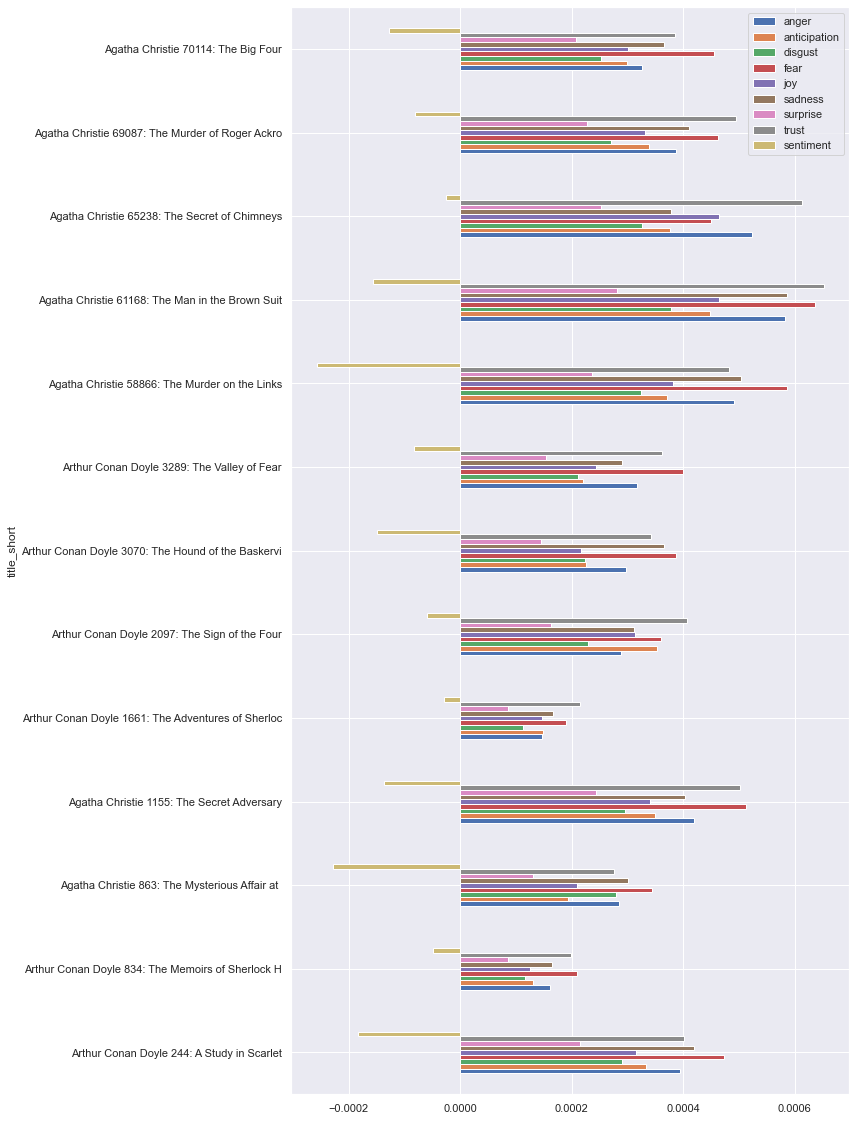

In [66]:
EMO_BOOKS.plot.barh(figsize=(10,20))

## Comparing Books

In [67]:
MYSTERIOUS = EMO_CHAPS.loc[863].copy()
ADVENTURES = EMO_CHAPS.loc[834].copy()

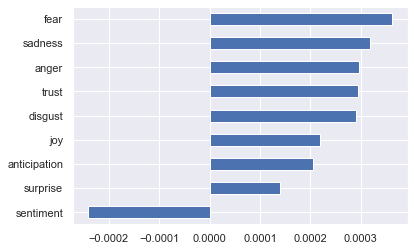

In [70]:
MYSTERIOUS.mean().sort_values().plot.barh();

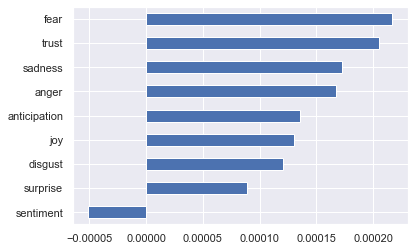

In [71]:
ADVENTURES.mean().sort_values().plot.barh();

In [72]:
MYSTERIOUS_chaps_thin = EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(863))
ADVENTURES_chaps_thin= EMO_CHAPS.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'}).query("book_id == {}".format(834))

In [77]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 10), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

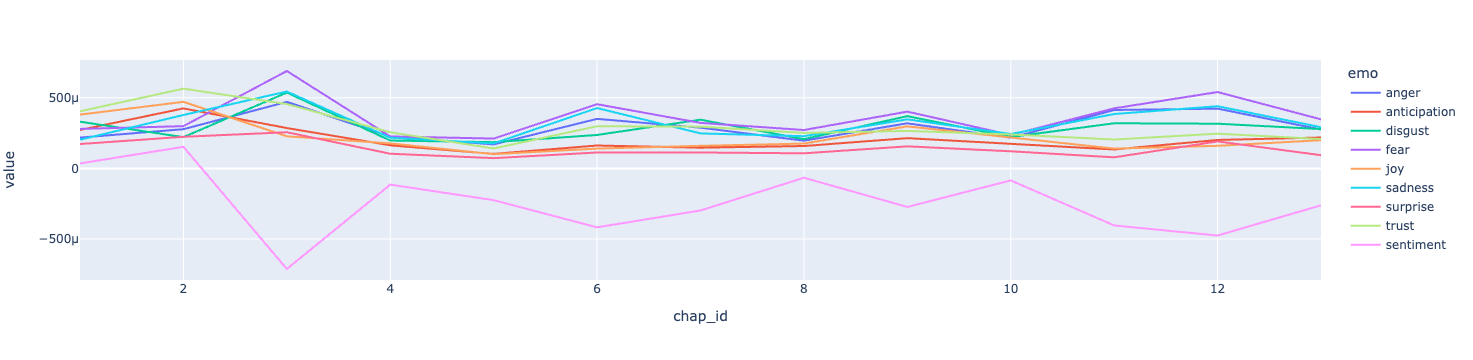

In [78]:
px.line(MYSTERIOUS_chaps_thin, x='chap_id', y='value', color='emo')

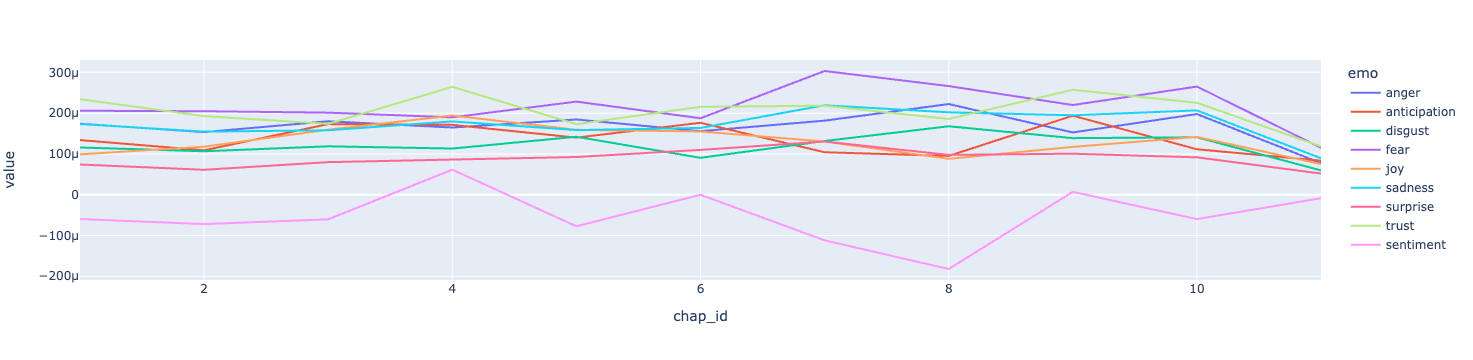

In [79]:
px.line(ADVENTURES_chaps_thin, x='chap_id', y='value', color='emo')